In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

2024-11-04 11:41:05.098599: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 11:41:05.113202: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 11:41:05.150226: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 11:41:05.204624: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-04 11:41:05.221517: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-04 11:41:07.330281: W tensorflow/compiler/tf2tensorrt/utils/p

In [2]:
train = pd.read_csv("~/TP2 RDn/train.csv")
test= pd.read_csv("~/TP2 RDn/test.csv")
gender = pd.read_csv("~/TP2 RDn/gender_submission.csv")


<Axes: xlabel='Embarked', ylabel='count'>

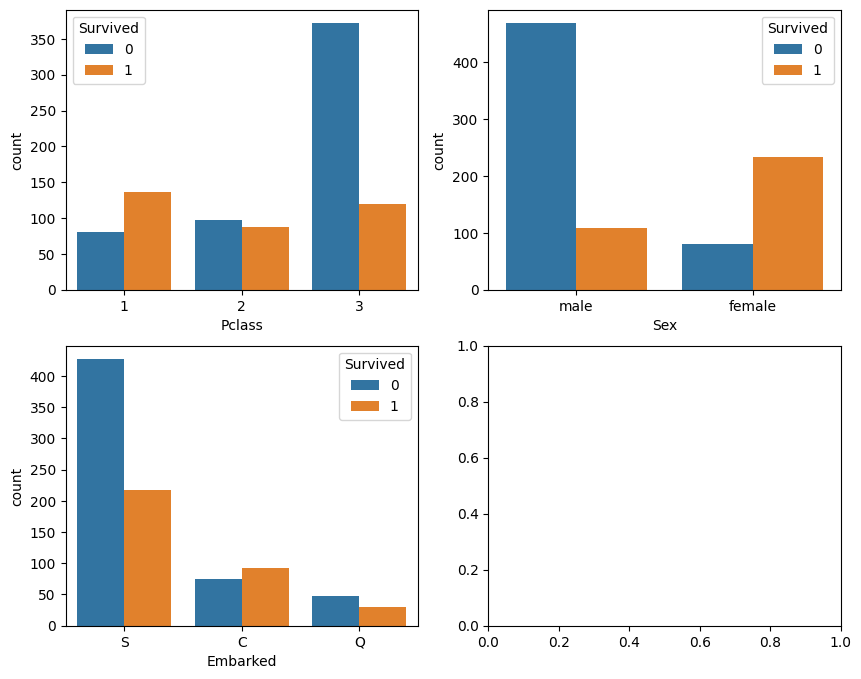

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.countplot(train, x = "Pclass", hue = "Survived", ax = axs[0,0])
sns.countplot(train, x = "Sex", hue = "Survived", ax = axs[0,1]) 
sns.countplot(train, x ="Embarked", hue = "Survived", ax = axs[1,0])


In [4]:
label_encoder = LabelEncoder()
colonnes_a_exclure = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch']
for col in train.columns :
    if (col not in colonnes_a_exclure) : 
        encoded_labels_train = label_encoder.fit_transform(train[col])
        train[col] = encoded_labels_train
for col in test.columns :
    if (col not in colonnes_a_exclure): 
        encoded_labels_test = label_encoder.fit_transform(test[col])
        test[col] = encoded_labels_test
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

In [5]:
#train.drop(columns=['Name'], inplace=True)
#train.drop(columns=['Ticket'], inplace=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,18,147,2
1,2,1,1,190,0,38.000000,1,0,596,207,81,0
2,3,1,3,353,0,26.000000,0,0,669,41,147,2
3,4,1,1,272,0,35.000000,1,0,49,189,55,2
4,5,0,3,15,1,35.000000,0,0,472,43,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,85,147,2
887,888,1,1,303,0,19.000000,0,0,14,153,30,2
888,889,0,3,413,0,29.699118,1,2,675,131,147,2
889,890,1,1,81,1,26.000000,0,0,8,153,60,0


<Axes: >

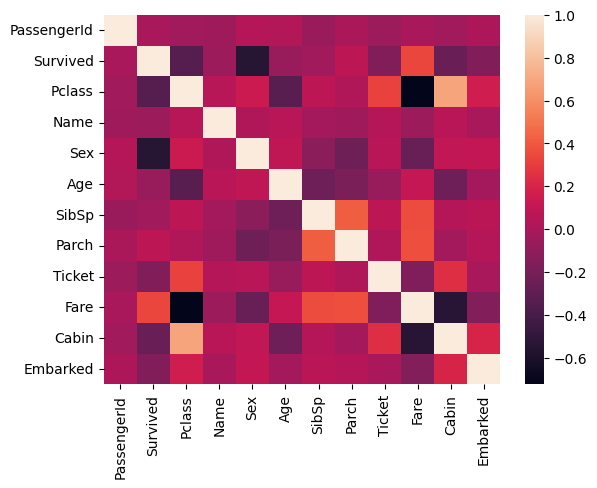

In [6]:
corr_train = train.corr()
sns.heatmap(corr_train, annot = False) 

In [7]:
features = ['PassengerId','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
x_train = train[features]
y_train = train['Survived']
x_test = test[features]
x_test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(891, 8)
(891,)
(418, 8)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Construire le modèle
model = Sequential()
model.add(Dense(64, input_shape=(8,), activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()
history = model.fit(x_train, y_train, epochs=100, batch_size=32)

/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4555 - loss: 0.7087
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7479 - loss: 0.6207
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7942 - loss: 0.5196
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8189 - loss: 0.4365
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8149 - loss: 0.4083
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8457 - loss: 0.3660
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8278 - loss: 0.3837
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8341 - loss: 0.3805
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8512 - loss: 0.3722
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8370 - loss: 0.3891
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8485 - loss: 0.3840
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

In [41]:
y_pred = (model.predict(x_test) > 0.3).astype(int)
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred.flatten()})
submission.to_csv('submission.csv', index=False)
print("Fichier de soumission 'submission.csv' créé avec succès.")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Fichier de soumission 'submission.csv' créé avec succès.


J'ai obtenu un score de 76 % 